# Polynomial Regression in Machine Learning

## Introduction
Polynomial regression is a form of regression analysis that models the relationship between a dependent variable and one or more independent variables as an nth degree polynomial. It is used to fit a non-linear relationship between the variables.

In this notebook, we'll:
1. Load and explore a dataset.
2. Preprocess the data.
3. Visualize the data.
4. Build and train a polynomial regression model.
5. Evaluate the model.
6. Visualize the model's predictions.


## Libraries
We'll start by importing the necessary libraries for this analysis.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Load Dataset
For this example, we'll use the `fetch_california_housing` function from `sklearn.datasets` to create a synthetic dataset for regression.

In [29]:
# Load the Boston housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='PRICE')

# Display the first few rows of the dataset
X.head(), y.head()


(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: PRICE, dtype: float64)

## Data Visualization
Let's visualize the data to understand its distribution and relationships.

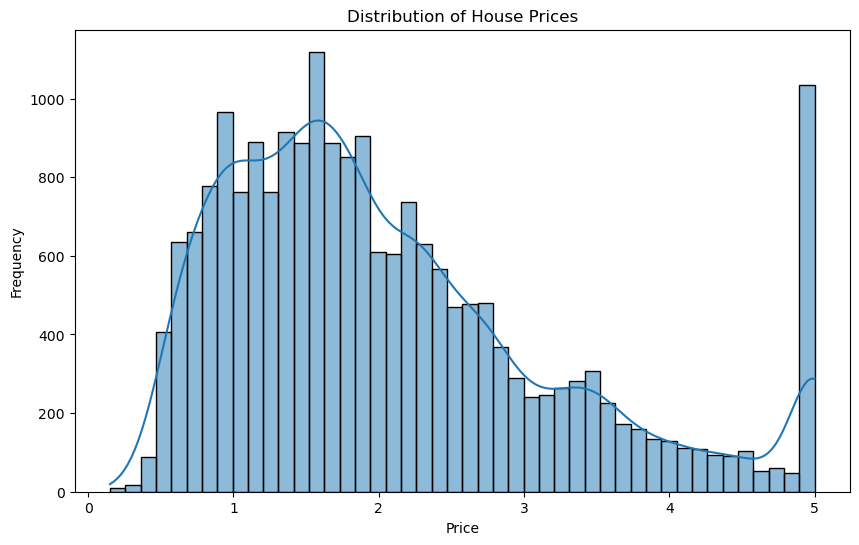

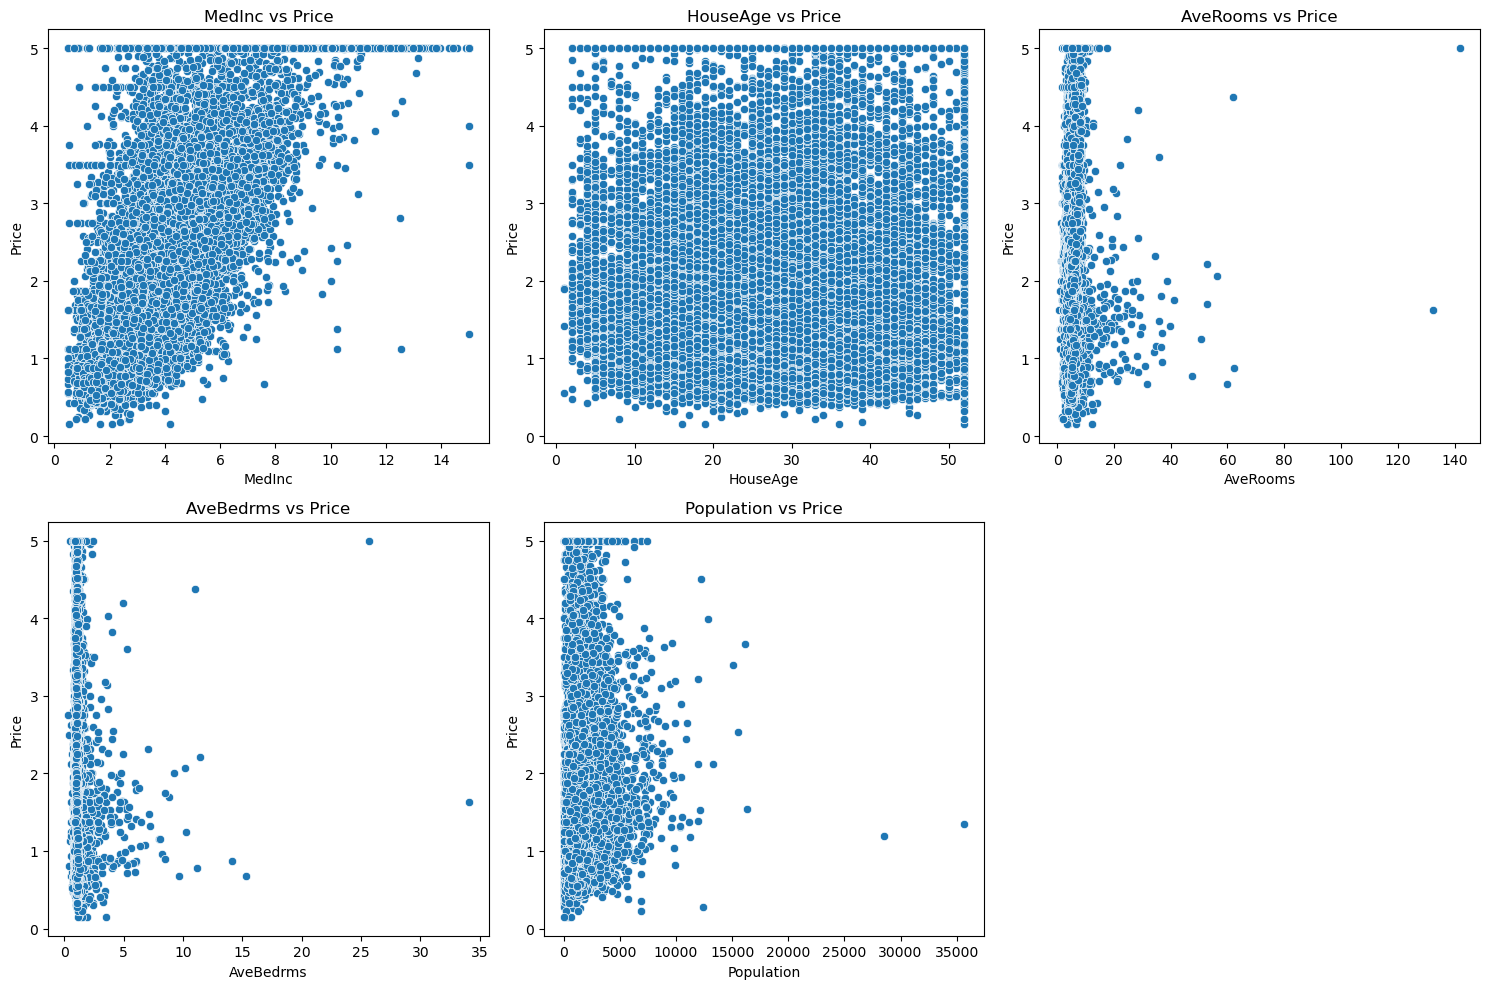

In [31]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between some features and the target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns[:5], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


## Data Preprocessing
We'll split the data into training and test sets for model training and evaluation.

In [50]:
# Convert to DataFrame for ease of use
X_df = pd.DataFrame(X, columns=cali_housing.feature_names)
y_df = pd.Series(y, name='Price')

# Select a single feature
X_feature = X_df[['MedInc']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)


## Build and Train the Model
Now, let's build a polynomial regression model using `PolynomialFeatures` and `LinearRegression` from `sklearn`.

In [52]:
# Initialize PolynomialFeatures with degree 3
poly = PolynomialFeatures(degree=3)

# Transform the features to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

## Model Evaluation
Evaluate the performance of the model using Mean Squared Error and R-squared metrics.

In [54]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.70
R-squared: 0.47


In [56]:
print(X_test.shape)
print(y_test.shape)

(4128, 1)
(4128,)


## Model Predicted Data Visualization
Visualize the polynomial regression fit compared to the true values.

C:\Users\M Ans\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


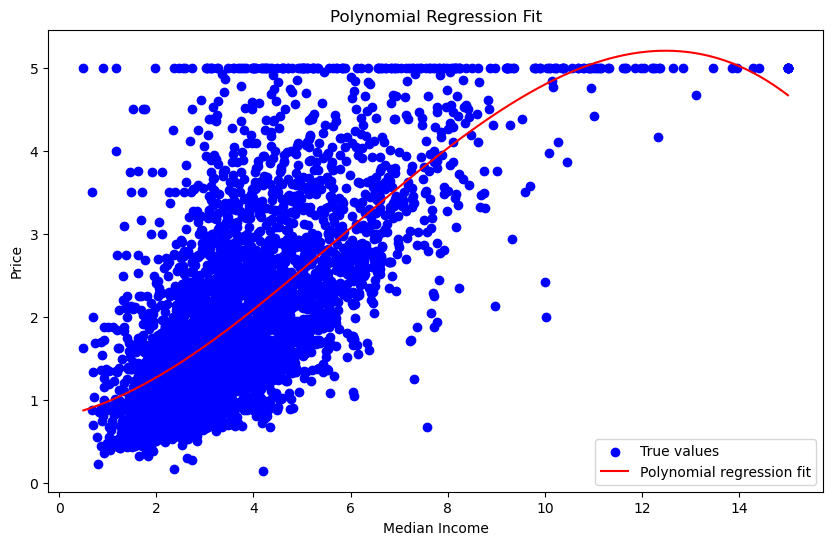

In [58]:
# Visualize the polynomial regression fit
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial regression fit')
plt.title('Polynomial Regression Fit')
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.legend()
plt.show()